# Building a Handwritten Digits Classifier 

**Image recognition** (or image classification) is the task of identifying images and categorizing them in one of several predefined distinct classes, in other words it's the process of taking an input and outputting a class or a probability that the input is a particular class. It's mainly used to perform tasks like labeling images with descriptive tags, searching for content in images, guiding robots, autonomous vehicles and driver assistance systems, it can be found at the core of everything from healthcare to security. Image recognition is natural for humans and animals but it's an extremely hard task for computer to perform. The most effective tool found for this kind of task is a **deep neural network**. In this project we'll: 

* Observe the limitations of traditional machine learning model for image classification
* Train, test and improve a few different deep neural networks for image classification

## Introduction

Deep neural networks have been used to reach state of the art performance on image classification tasks in the last decade. For same image classification tasks, deep neural networks actually perform as well or slightly better than the human benchmark. However image classification is still considered a hard task, essentially for these three reasons: 

1. Each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.


2. Images are often downsampled to lower resolutions and this is a limitation of compute power unfortunately. For instance, the resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of about 8 million of features. Images of this resolution are usually scaled down to between 128 and 512 pixel in either direction for faster processing. This often results in a loss of detail that's available for training and patern matching.

3. The features in an image don't have an obvious linear or nonlinear relatinship that can be learned with a model like linear or logistic regression. In grayscale (no color), each pixel is represented as a brightness value ranging from 0 to 256.

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

<img src="Images/Neural_Network.png"/>

*Each neuron takes an input, performs some operations then passes the output to the following neuron. This model works in a similar way to the neurons in the human brain*

Let's start exploring the effectiveness of deep, feedforward neural networks at classifying images.

## Working with Image Data

Scikit learn contains a number of dataset pre-loaded with the library, within the namespace of sklearn.datasets. The *load_digits()* function returns a copy of a hand-written digits dataset, we'll work with that dataset. Because dataframes are a tabular representation of the data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape these pixel  values back to its original dimension.

In [85]:
#Importing the libraries
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
#Defining the labels and the data
digits = load_digits()
labels = pd.Series(digits["target"])
data = pd.DataFrame(digits["data"])

#Showing some rows of the dataframe
data.head(3)

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  

[3 rows x 64 columns]

To reshape the image, we need to convert a row to a numpy array and pass the result into the *numpy.reshape()* function.

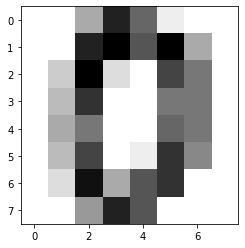

In [87]:
#Taking the first row of the dataframe
first_image = data.iloc[0]

#Converting that row in a numpy array
image = first_image.values

#Applying the reshape() function
image = image.reshape(8,8)

#Showing the image
plt.imshow(image, cmap="gray_r")

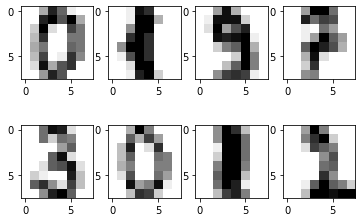

In [88]:
#Showing some other images
fig, ax = plt.subplots(2, 4)
ax[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap="gray_r")
ax[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap="gray_r")
ax[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap="gray_r")
ax[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap="gray_r")
ax[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap="gray_r")
ax[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap="gray_r")
ax[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap="gray_r")
ax[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap="gray_r")

## K-Nearest Neighbors Model

Now we'll setup a pipeline for testing and training KNN models. They should perform quite well considering that while linear and logistic regression models make assumpitions about the linearity between the features and the output labels, the K-Nearest Neighbors algorithm make no such assumptions, this allow them to capture nonlinearity in the data. 

In [89]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

#Function for training the knn models
def train_knn(number_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = number_neighbors)
    knn.fit(train_features, train_labels)
    return knn

#function to test the models
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = sum(predictions == test_labels) / len(predictions)
    return accuracy

#Function to perform a 4-fold cross validation
def knn_cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies    

Now we'll compute the results using different k values.

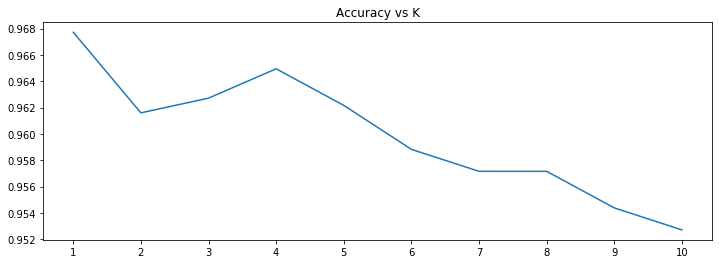

In [90]:
#Creating a list that contains the mean accuracies as k changes
k_accuracies = []
for k in range(1,11):
    accuracies = knn_cross_validate(k)
    mean_accuracy = np.mean(accuracies)
    k_accuracies.append(mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
plt.plot(range(1,11), k_accuracies)
plt.xticks(range(1,11))
plt.title("Accuracy vs K")
plt.show()

In [91]:
#Showing the accuracy as k changes
k_accuracies

[0.9677233358079684,
 0.9616010888393962,
 0.9627183865379857,
 0.9649480326651819,
 0.9621665429349171,
 0.9588270230141054,
 0.9571591190299431,
 0.9571578817124474,
 0.9543801039346697,
 0.9527097253155159]

## Random Forest Model

We'll test a random forest model as well to compare the performance with the neural networks. We'll redefine the train and cross validation functions to match our Random Forest requirements.

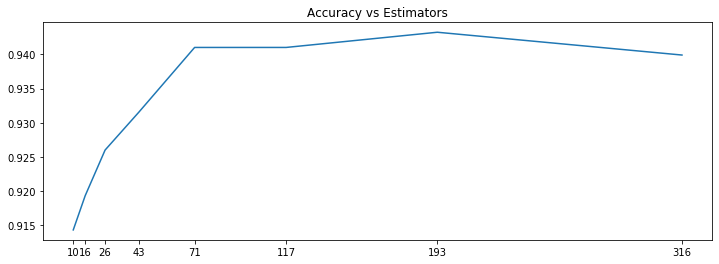

In [92]:
from sklearn.ensemble import RandomForestClassifier
#Function for training the random forest models
def train_rf(number_estimators, train_features, train_labels):
    rf = RandomForestClassifier(n_estimators = number_estimators)
    rf.fit(train_features, train_labels)
    return rf

#Function to perform a 4-fold cross validation
def rf_cross_validate(number_estimators):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_rf(number_estimators, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies    

#Creating a list that contains the mean accuracies as estimators changes
estimators_accuracies = []
estimators = np.logspace(1, 2.5, 8, dtype=int)
for n in estimators:
    accuracies = rf_cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    estimators_accuracies.append(mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
plt.plot(estimators, estimators_accuracies)
plt.xticks(estimators)
plt.title("Accuracy vs Estimators")
plt.show()

In [93]:
#Showing the accuracy as number of estimators changes
estimators_accuracies

[0.914303390249938,
 0.9193145261073992,
 0.9259935659490225,
 0.931549121504578,
 0.9410121257114575,
 0.9410133630289531,
 0.9432380598861667,
 0.9399010146003465]

## Neural Network with One Hidden Layer

There are few downsides to using k-nearest neighbors:

* High memory usage (for each new unseen observation, many comparisons need to be made to seen observation).
* No model representation to debug and explore.

Random forest perform good as well, now let's try a neural network with a single layer.

In [94]:
#Importing the library
from sklearn.neural_network import MLPClassifier

#Function for training the neural network
def train_nn(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neurons, max_iter=1000)
    mlp.fit(train_features, train_labels)
    return mlp

#Function to perform a 4-fold cross validation
def nn_cross_validate(neurons, number_splits):
    fold_accuracies = []
    kf = KFold(n_splits = number_splits, random_state = 1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies    

Now we'll train and test a neural network with 1 hidden layer using different numbers of neurons.

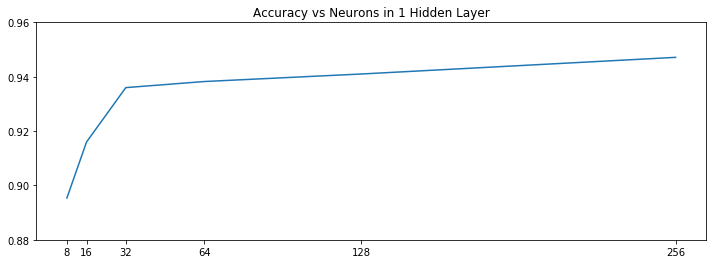

In [95]:
#Creating a list that contains the mean accuracies as the number of neurons changes
number_neurons = [(8,), (16,), (32), (64,), (128,), (256,)]
number_neurons_accuracies = []
for n in number_neurons:
    accuracies = nn_cross_validate(n, 4)
    mean_accuracy = np.mean(accuracies)
    number_neurons_accuracies.append(mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
plt.plot(x, number_neurons_accuracies)
plt.xticks(x)
plt.yticks(np.arange(0.88, 0.98, 0.02))
plt.title("Accuracy vs Neurons in 1 Hidden Layer")
plt.show()  

In [96]:
#Showing the accuracy as the number of neurons per layer changes
number_neurons_accuracies

[0.8953711952487008,
 0.9159725315515961,
 0.9359898539965354,
 0.9382306359811927,
 0.9410034644889879,
 0.9471257114575601]

### Train and Test Sets Performance Comparison

For each neural network model we'll compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tand to perform well on the train set but poorly on the test set.

In [97]:
#Defining a function to compare the scores in train and test set
def train_vs_test_score(k, number_splits):
    train_fold_accuracies = []
    test_fold_accuracies = []
    kf = KFold(n_splits = number_splits, random_state = 1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(k, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracy = test(model, train_features, train_labels)
        train_fold_accuracies.append(train_accuracy)
        test_fold_accuracies.append(test_accuracy)
    return train_fold_accuracies, test_fold_accuracies  

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


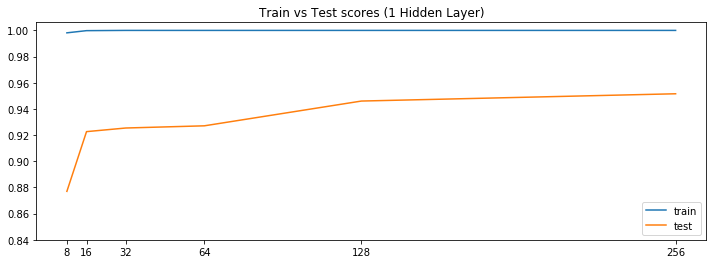

In [98]:
#Creating a list that contains the mean accuracies as the number of neurons changes
number_neurons = [(8,), (16,), (32), (64,), (128,), (256,)]
avg_score_train = []
avg_score_test = []
for n in number_neurons:
    train_accuracies, test_accuracies = train_vs_test_score(n, 4)
    train_mean_accuracy = np.mean(train_accuracies)
    test_mean_accuracy = np.mean(test_accuracies)
    avg_score_train.append(train_mean_accuracy)
    avg_score_test.append(test_mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
train_line = plt.plot(x, avg_score_train, label = "train")
test_line = plt.plot(x, avg_score_test, label = "test")
plt.xticks(x)
plt.yticks(np.arange(0.84, 1.00, 0.02))
plt.title("Train vs Test scores (1 Hidden Layer)")
plt.legend(handles = [train_line[0], test_line[0]], loc = "lower right")
plt.show()  

In [99]:
#Showing the results for the train set
avg_score_train

[0.9981442991238911, 0.9998144023756496, 1.0, 1.0, 1.0, 1.0]

In [100]:
#Showing the results for the test set
avg_score_test

[0.8770193021529324,
 0.9226503340757239,
 0.9254219252660233,
 0.9270947785201683,
 0.9460207869339272,
 0.9515812917594655]

As we expected, the performance on the train set is higher than the performance on the test set, however the model perform well in the test set and we can say that there is no overfitting since the performance differences aren't that high.

## Neural Network with Two Hidden Layers

Now we'll train and test the same neural network model but this time we'll use 2 hidden layers. Let's see if this involves some improvement.

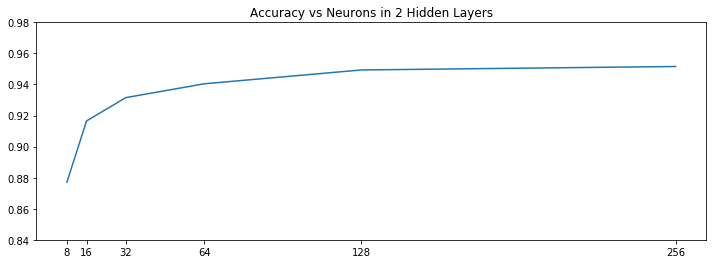

In [101]:
#Creating a list that contains the mean accuracies as the number of neurons changes
number_neurons = [(8,8), (16,16), (32,32), (64,64), (128,128), (256,256)]
number_neurons_two_accuracies = []
for n in number_neurons:
    accuracies = nn_cross_validate(n, 4)
    mean_accuracy = np.mean(accuracies)
    number_neurons_two_accuracies.append(mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
plt.plot(x, number_neurons_two_accuracies)
plt.xticks(x)
plt.yticks(np.arange(0.84, 0.98, 0.02))
plt.title("Accuracy vs Neurons in 2 Hidden Layers")
plt.show()  

In [102]:
#Showing the accuracy as the number of neurons per layer changes
number_neurons_two_accuracies

[0.8770254887404109,
 0.9165132392972036,
 0.9315429349170996,
 0.9404528582034151,
 0.9493553575847562,
 0.9515850037119525]

### Train and Test Sets Performance Comparison

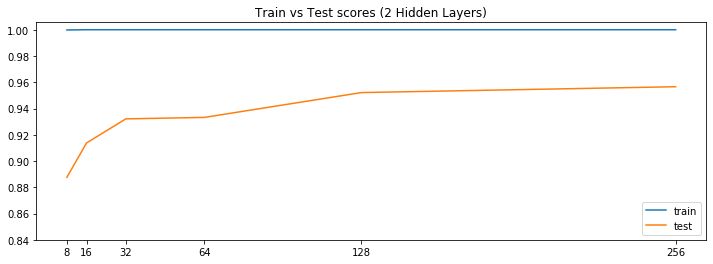

In [103]:
#Creating a list that contains the mean accuracies as the number of neurons changes
number_neurons = [(8,8), (16,16), (32,32), (64,64), (128,128), (256,256)]
avg_score_train = []
avg_score_test = []
for n in number_neurons:
    train_accuracies, test_accuracies = train_vs_test_score(n, 4)
    train_mean_accuracy = np.mean(train_accuracies)
    test_mean_accuracy = np.mean(test_accuracies)
    avg_score_train.append(train_mean_accuracy)
    avg_score_test.append(test_mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
train_line = plt.plot(x, avg_score_train, label = "train")
test_line = plt.plot(x, avg_score_test, label = "test")
plt.xticks(x)
plt.yticks(np.arange(0.84, 1.00, 0.02))
plt.title("Train vs Test scores (2 Hidden Layers)")
plt.legend(handles=[train_line[0], test_line[0]], loc= "lower right")
plt.show()  

In [104]:
#Showing the results for the train set
avg_score_train

[0.9998145400593472, 1.0, 1.0, 1.0, 1.0, 1.0]

In [105]:
#Showing the results for the test set
avg_score_test

[0.887582281613462,
 0.9137391734719129,
 0.9321096263301163,
 0.9332195001237318,
 0.9521380846325167,
 0.9565936649344221]

In the 2 hidden layer neural network the train and test sets performances are close as well, there is no overfitting.

## Neural Network with Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting can happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation from 4 to 6 while testing networks with 3 hidden layers.

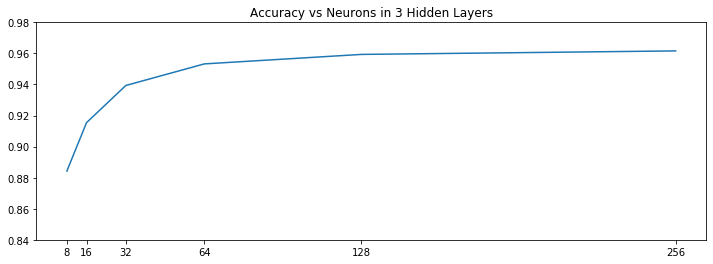

In [106]:
#Creating a list that contains the mean accuracies as the number of neurons changes
number_neurons = [(8,8,8), (16,16,16), (32,32,32), (64,64,64), (128,128,128), (256,256,256)]
number_neurons_three_accuracies = []
for n in number_neurons:
    accuracies = nn_cross_validate(n, 6)
    mean_accuracy = np.mean(accuracies)
    number_neurons_three_accuracies.append(mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
plt.plot(x, number_neurons_three_accuracies)
plt.xticks(x)
plt.yticks(np.arange(0.84, 0.98, 0.02))
plt.title("Accuracy vs Neurons in 3 Hidden Layers")
plt.show()  

In [107]:
#Showing the accuracy as the number of neurons per layer changes
number_neurons_three_accuracies

[0.8842679301374953,
 0.9154180602006688,
 0.9393459680416202,
 0.953253437383872,
 0.9593645484949834,
 0.9616164994425863]

### Train and Test Sets Performance Comparison

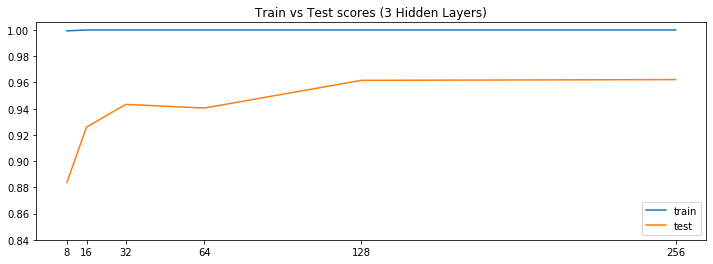

In [108]:
#Creating a list that contains the mean accuracies as the number of neurons changes
number_neurons = [(8,8,8), (16,16,16), (32,32,32), (64,64,64), (128,128,128), (256,256,256)]
avg_score_train = []
avg_score_test = []
for n in number_neurons:
    train_accuracies, test_accuracies = train_vs_test_score(n, 6)
    train_mean_accuracy = np.mean(train_accuracies)
    test_mean_accuracy = np.mean(test_accuracies)
    avg_score_train.append(train_mean_accuracy)
    avg_score_test.append(test_mean_accuracy)
    
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
train_line = plt.plot(x, avg_score_train, label = "train")
test_line = plt.plot(x, avg_score_test, label = "test")
plt.xticks(x)
plt.yticks(np.arange(0.84, 1.00, 0.02))
plt.title("Train vs Test scores (3 Hidden Layers)")
plt.legend(handles=[train_line[0], test_line[0]], loc= "lower right")
plt.show()  

In [109]:
#Showing the results for the train set
avg_score_train

[0.9993321459712184, 1.0, 1.0, 1.0, 1.0, 1.0]

In [110]:
#Showing the results for the test set
avg_score_test

[0.8836863619472314,
 0.9259791898922334,
 0.943240431066518,
 0.9404570791527314,
 0.9616109253065774,
 0.962166480862133]

We can conclude that no overfitting occurs.

## Conclusion

In this project we have trained and tested some different models. The **K-Nearest Neighbors** model performed very well with a top accuracy score of 0.9677 maybe because the testing set have high similarity with the training set, however there are some big limitations:

* The model perform the best with k parameter equals to 1 and it seems that the performance cannot be improved since as soon as we increase k it gets worse.
* High memory usage (for each new unseen observation, many comparisons need to be made to seen observation).
* No model representation to debug and explore.

The **Random Forest** model perform good as well, with a top accuracy score of 0.9432. This is a very good model which, in this particular case, perform slighlty worse than a neurla network with 3 hidden layer, although is much faster. In general we should decide, between a Random Forest and a Deep Neural Network model, based on the data type we have. We should use the neural network mainly for:

* Images
* Audio
* Text

If we are going to work with tabular data, it's worth to check the Random Forest first because it's easier.

Now we'll analyze the **Neural Networks**' results. First of all let's plot the results as the number of neurons and hidden layers change.

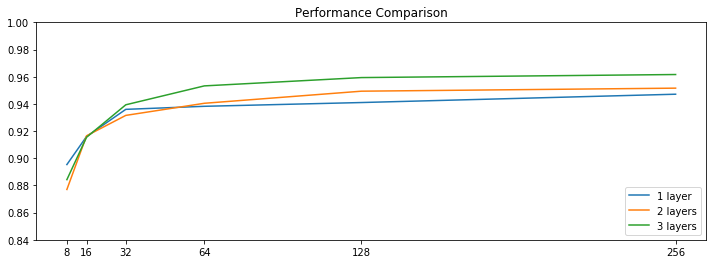

In [111]:
#Plotting the results
plt.figure(figsize=(12,4))
x = [8, 16, 32, 64, 128, 256]
one_hidden = plt.plot(x, number_neurons_accuracies, label = "1 layer")
two_hidden = plt.plot(x, number_neurons_two_accuracies, label = "2 layers")
three_hidden = plt.plot(x, number_neurons_three_accuracies, label = "3 layers")
plt.xticks(x)
plt.yticks(np.arange(0.84, 1.00, 0.02))
plt.title("Performance Comparison")
plt.legend(handles=[one_hidden[0], two_hidden[0], three_hidden[0]], loc= "lower right")
plt.show()  

Comparing the Multi-Layer Perceptron Classifier models we can observe:

* It seems there isn't linearity between performance and number of hidden layers, however there is a tendency to increase the performance score when incrementing the number of hidden layers or the number of neurons per layer.
* When we use more than 64 neurons per layer there is no significant increase of the performance.
* The best accuracy score is 0.9616 reached when using 3 hidden layers and 256 neurons confirming the fact that having more layers and more neurons tends to improve the performance.